# Simple Linear Regression
In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

1. Reading and understanding the data.
2. Training the model.
3. Residual analysis.(this residual should normally distributed.
4. Predicing and evaluting  on the test set




# Step 1: Reading and Understanding the Data
Let's start with the following steps:

Importing data using the pandas library

Understanding the structure of the data

In [1]:
import numpy as np 
import pandas as pd

In [2]:
advertisement=pd.read_csv(r'D:\har\mldl\upgrad\advertising.csv')

In [3]:
advertisement.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertisement.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advertisement.shape

(200, 4)

# Step 2: Visualising the Data¶

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Sales

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='Sales'>

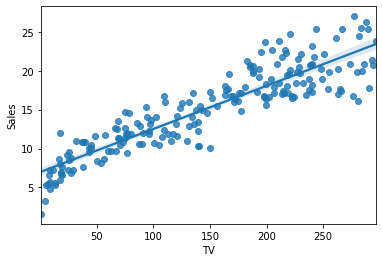

In [8]:
sns.regplot(x='TV',y='Sales',data=advertisement)

as this show there is fit in trhe regrassion line and the value are very close to regression line which indicates there is corelation between sales and Tv

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

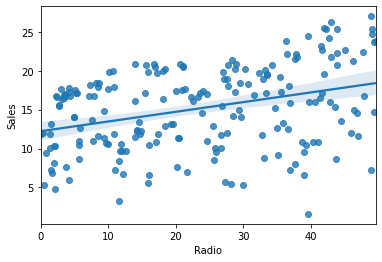

In [9]:
sns.regplot(x='Radio',y='Sales',data=advertisement)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

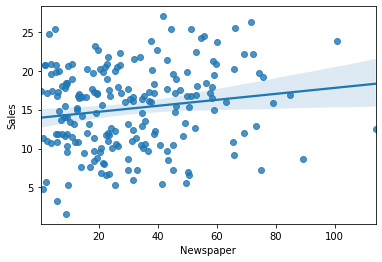

In [10]:
sns.regplot(x='Newspaper',y='Sales',data=advertisement)

same thing we are doing with pair plot so that we can get 3 graph in single window

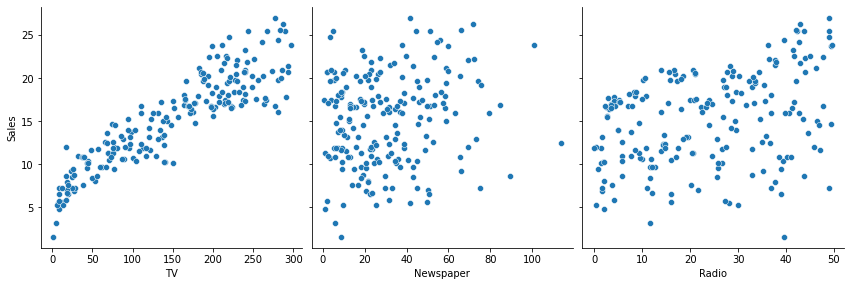

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(advertisement,x_vars=['TV', 'Newspaper', 'Radio'],y_vars='Sales',size=4, aspect=1, kind='scatter')

In [12]:
advertisement.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


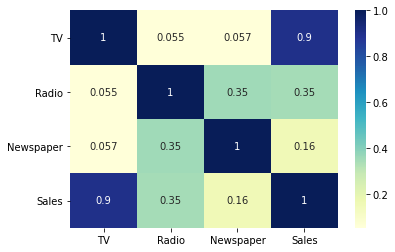

In [13]:
sns.heatmap(advertisement.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

# Generic Steps in model building using statsmodels

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [14]:
import statsmodels
import statsmodels.api as sm
import sklearn

## steps:

-- create x an y predictive variable.

-- create train and test sets (70-30,80-20)

-- train the model on training set(learn the coefficient)

-- evalute the model(training set,test set)

In [15]:
# create x and y(x will basically will dataframe and y is usally single column)
X = advertisement['TV']
y = advertisement['Sales']

In [16]:
# train_test split
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)
print(X_train.shape,'-->','X_train\n',X_test.shape,'-->','X_test\n',y_train.shape,'-->','y_train\n',y_test.shape,'-->','y_test')

(140,) --> X_train
 (60,) --> X_test
 (140,) --> y_train
 (60,) --> y_test


random_state is basically used for reproducing your problem the same every time it is run. If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

In [18]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [19]:
# traning the model(in this stats model contant is not not added so we will add contant whic is c in y=mx+c)
X_train_sm=sm.add_constant(X_train)

In [20]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


1 is the constant in this

 y=c+m1.x1
 
 y=constant+m1.TV

In [21]:
# fitting the model(ols=ordinanry least square)
lr=sm.OLS(y_train,X_train_sm)#we just created  instant of class
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

# y=c+mx

#sales=6.94+0.05TV

-- from scatter plot we confirmed that as sales increases as the amount of advertisement in tv increases it s positive slop.

-- if you increase the amount of money spent on telvision adverstisement  by 1 unit the amount of sales increase by 0.05.
-- and the intersept if you spent 0 on telvision advetsement  still there will be 6.9 sales

In [22]:
# paras only gives us the coefficient  thhere are lot of other details we can acess by  only stats model gives these kind of summry.
#sklearn does not gives this kind of summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.52e-52
Time:                        10:41:33   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const is intercept 

p value is basically 0 which means  are significant the algorithium is telling that values are very low the relationship between sales and tv is not obtain by chance there is some real coefficent

A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.


R2 value 0.816 very about 81 % variance in sale is explaiend by Tv 

it is sayiing about corelation not causation

1)  coefficient and p-value

2)  r squared value  is 81.6 very high    (Recall that R-squared varies from 0 to 1 wherein a value of 0 implies that none of the variance in the data is explained and a value of 1 implies that all of the variance in the data is explained. Can you answer the question now? Hence, a value of 0.153 is a low value of R-squared which in turn implies that the model doesn't explain much variance present in the data.)

3) p(f-statictic) is low firt is not by chance

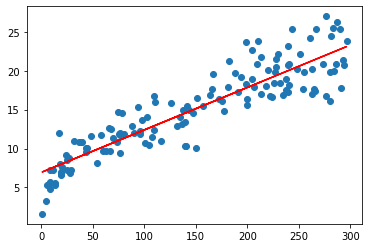

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9487+0.0545*X_train,'r')#for regression lin
plt.show()

## STEP 3 Residual analysis

residual=observedValue−predictedValue


distribution of error train we doing analysis on train set we have a model  model

In [24]:
# error=f(y_train,y_train_pred)

In [25]:
# again doing above in simpler manner
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

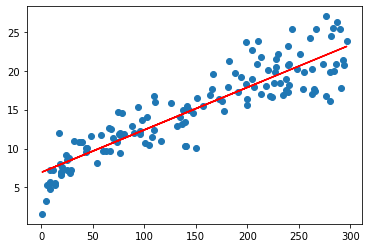

In [26]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')#for regression lin
plt.show()

In [27]:
# residual=observedValue−predictedValue
res=y_train-y_train_pred

Text(0.5, 1.0, 'residual plot')

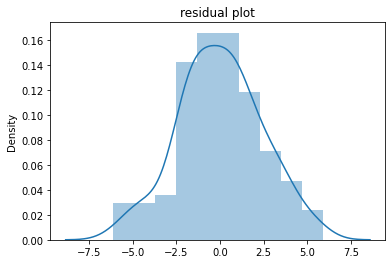

In [28]:
# plot the residuals

plt.figure
sns.distplot(res)
plt.title('residual plot')

1. errors are normally distributed 

2. should not be able to identify any solid patter 
3. the center of normal is 0.0 and shape is good normal distributed the residual is a norrmal distribute and cntered at 0.0

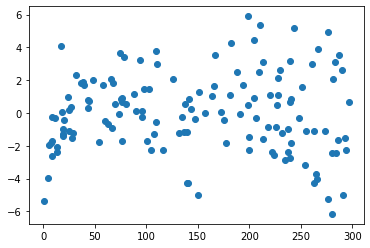

In [29]:
plt.scatter(X_train,res)
plt.show()

variance in residual is very high 
y ppovitive and y negative 


# 4. making prediction and evaluation test set.

In [30]:
# prediction on the test set(y_test_pred)
# evaluate the data set on r squared on test set


In [31]:
# add constant/intercept in test set as well
X_test_sm=sm.add_constant(X_test)
# predicting the test
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
#evaluating the model on r-squared  test set
# r-squared
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.792103160124566

In [34]:
# mean squared error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826953

NameError: name 'X_test_pred' is not defined

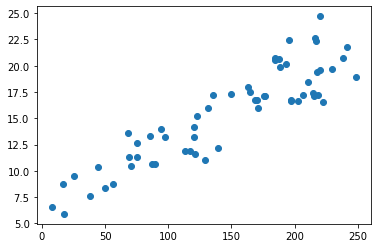

In [35]:
plt.scatter(X_test,y_test)
plt.plot(X_test,X_test_pred,'r')
plt.show()

as we done plot for training set we have done for test well

less rmse value tell model is fitted well

# Linera regression using Sklearn

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)


In [37]:
# steps in sklearn model building
# create an object of linear regression
# fit the model
#see the parameter of the model and make prediction
# evaluate the test


In [38]:
# import the library linear regression from sklearm
from sklearn.linear_model import LinearRegression # whwn we write classes we use upper case

In [39]:
# craete object of linear regression 
lm=LinearRegression()

In [40]:
# fit the model
lm.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
X_train.shape

(140,)

In [42]:
# we need to do the reshaping
# rehape to (n,1) from (140,)

# for now we know the number of row if we dont we can use -1
X_train_lm=X_train.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [43]:
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [44]:
print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [45]:
# now we have converted it to 2D array now  we can fit it in model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [46]:
print(lm.coef_)#coefficient of telvion 
print(lm.intercept_)#it the intercept in equation
#and this will be same which we got in stats model above

[0.05454575]
6.948683200001357


In [47]:
# make prediction
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [48]:
# evaluate the model in we can look at the r2
print(r2_score(y_true=y_test, y_pred=y_test_pred))
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.7921031601245662
0.8157933136480389


---
## Addressing some common questions/doubts on Simple Linear Regression
---

### Q: Why is it called 'R-squared'?

In [49]:
corr=np.corrcoef(X_train,y_train)
print(corr)

[[1.         0.90321277]
 [0.90321277 1.        ]]


Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

The RMSE:
 - depends on the units of the Y variables(perfect model it can be 0 but it doest happened)
 - is NOT a normalized measure
 
While it can't really tell you of the gooodness of the particular model, it can help you compare models. 

A better measure is R squared, which is normalized.

### Q: Does scaling have an impact on the model? When should I scale?

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

#### SciKit Learn has these scaling utilities handy

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.reshape(-1,1)
y_train_scaled = y_train.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [52]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [53]:
X_train_scaled.shape

(140, 1)

In [59]:
# Create a scaler object using StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [60]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 1.45915026093592e-16 0.7071067811865476
mean and sd for y_train_scaled: -2.5376526277146434e-16 1.0


In [61]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [62]:
# Check the parameters
lr_scaled.params

array([-5.73326109e-16,  0.00000000e+00,  9.03212773e-01])

As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [63]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.52e-52
Time:                        10:43:47   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.733e-16      0.037  -1.57e-14      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent